In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('data/AB_NYC_2019.csv')

In [2]:
df_5 = df[['neighbourhood_group','room_type','number_of_reviews','reviews_per_month','availability_365']]
print(df_5.head())
print(df_5.shape)

  neighbourhood_group        room_type  number_of_reviews  reviews_per_month  \
0            Brooklyn     Private room                  9               0.21   
1           Manhattan  Entire home/apt                 45               0.38   
2           Manhattan     Private room                  0                NaN   
3            Brooklyn  Entire home/apt                270               4.64   
4           Manhattan  Entire home/apt                  9               0.10   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0  
(48895, 5)


In [3]:
print(df['neighbourhood_group'].value_counts())
print()
print(df['room_type'].value_counts())

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [4]:
cat_ftrs = ['neighbourhood_group']
ordinal_ftrs = ['room_type']
ordinal_cats = [['Entire home/apt','Private room','Shared room']]
num_ftrs = ['number_of_reviews', 'reviews_per_month']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator=RandomForestRegressor(),random_state=3)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('num', numeric_transformer, num_ftrs)])

In [5]:
X_prep = preprocessor.fit_transform(df_5)
feature_names = list(preprocessor.named_transformers_['cat'][0].get_feature_names()) +\
                preprocessor.transformers_[1][-1] +\
                preprocessor.transformers_[2][-1]
print(feature_names)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['x0_Bronx', 'x0_Brooklyn', 'x0_Manhattan', 'x0_Queens', 'x0_Staten Island', 'room_type', 'number_of_reviews', 'reviews_per_month']


In [6]:
df_preprocessed = pd.DataFrame(data=X_prep,columns=feature_names)
label = df['price'].copy()
#label[label < 100] = 0
#label[label > 100] = 1
#lab_enc = LabelEncoder()
#df_label = lab_enc.fit_transform(label)
lab_enc = StandardScaler()
df_label = lab_enc.fit_transform(pd.DataFrame(label))
price = pd.DataFrame(df_label, columns=['price'])
df1_preprocessed = pd.concat([df_preprocessed, price], axis=1)
print(df1_preprocessed.head())
print(df1_preprocessed[df1_preprocessed["price"] > 20][:10])

   x0_Bronx  x0_Brooklyn  x0_Manhattan  x0_Queens  x0_Staten Island  \
0       0.0          1.0           0.0        0.0               0.0   
1       0.0          0.0           1.0        0.0               0.0   
2       0.0          0.0           1.0        0.0               0.0   
3       0.0          1.0           0.0        0.0               0.0   
4       0.0          0.0           1.0        0.0               0.0   

   room_type  number_of_reviews  reviews_per_month     price  
0        1.0          -0.320414          -0.600217 -0.015493  
1        0.0           0.487665          -0.491387  0.300974  
2        1.0          -0.522433          -0.558200 -0.011329  
3        0.0           5.538156           2.235780 -0.265335  
4        0.0          -0.320414          -0.670637 -0.302811  
       x0_Bronx  x0_Brooklyn  x0_Manhattan  x0_Queens  x0_Staten Island  \
2698        0.0          0.0           1.0        0.0               0.0   
3537        0.0          0.0           1.0   

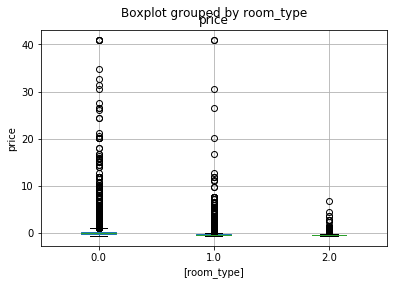

In [7]:
df1_preprocessed[['price','room_type']].boxplot(by='room_type')
plt.ylabel('price')
plt.show()

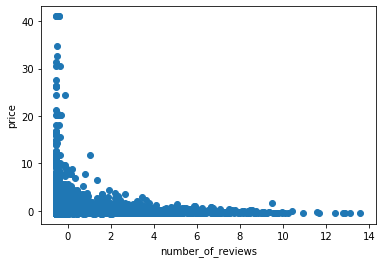

In [8]:
plt.scatter(df1_preprocessed['number_of_reviews'],df1_preprocessed['price'])
plt.xlabel("number_of_reviews")
plt.ylabel("price")
plt.show()

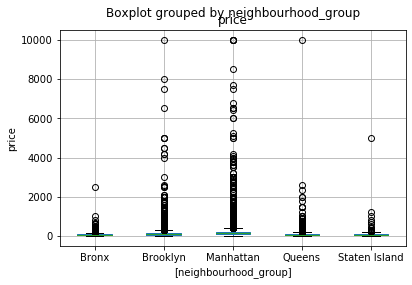

In [9]:
df[['price','neighbourhood_group']].boxplot(by='neighbourhood_group')
plt.ylabel('price')
plt.show()